<img style="float: left" src="images/ucl_logo.png">


# Spatial filtering using ENVI 5.5

## Aims

 After completing this practical, you should be able to answer the questions: Which type of filter should I use for a given filtering application? What impact will the size and shape of the filter have on the output? You should have some understanding of the process (and issues) of spatial filtering of EO data using ENVI. 

## Data

The datasets you need for this practical are available from (skip this step if you've already downloaded them for the [Image Display](ImageDisplay.ipynb) practical):


* [ETM-190600](https://github.com/profLewis/geog2021/blob/master/practical1/ETM-190600)
* [ETM-190600.HDR](https://github.com/profLewis/geog2021/blob/master/practical1/ETM-190600.HDR)
* [TM-280589](https://github.com/profLewis/geog2021/blob/master/practical1/TM-280589)
* [TM-280589.HDR](https://github.com/profLewis/geog2021/blob/master/practical1/TM-280589.HDR)


You should download these data and put them in a directory (folder) that you will remember!

The data you will be using are:

* six wavebands of a Landsat TM image over Greater London, imaged on May 28th 1989. The data were obtained from the GLCF which maintains a large database of (freely available) Landsat and other imagery. The data are at an original pixel spacing of 28.5 m, but have been resampled to a 25 m grid here. The data are in a Transverse Mercator projection with OSGB 1936 datum. 

* six wavebands (nominally the same wavelengths) of a Landsat ETM image with 25 m spatial resolution, covering the same spatial extent. These data were obtained on June 19th 2000. The data were obtained from Landmap which contains a database available to Universities and other users through an Athens login (done via the institution you are at). 

The wavebands are:

|1|2|3|4|5|6|
| --- | --- | --- | --- | --- | --- |
| blue | green | red | nir | swir1 | swir 2 |
|450-520 nm|520-600 nm| 630-690 nm|760-900 nm|1550-1750 nm|2080-2350 nm|

The extent of the imagery is (Lat/Lon): 

$$
    51^o 43'   9.23'' North, 0^o 36' 18.37'' West 
$$

to


$$
    51^o 16' 29.32'' North,  0^o 27' 24.60'' East
$$


##  Introduction

***In this section, we load the image data we wish to explore***.

The purpose of this practical is for you to build on practical 1 and learn about the process of spatial (convolution) filtering. 

Note that convolution is a mathematical operation involving the modification of one function by another to produce a third (output) function. In spatial fitering this implies the operation of a filter (one function) on an input image (another function) to produce a filtered image (the output).

The session will be normally requiring at least two hours of effort. You may not complete all tasks in detail during the live session, so once you get the hang of how to use the tools, move on to the next section and return later to think more about the remote sensing. 

There is a good material for this in text books (e.g. Jensen, Curran etc.) and some of this is online e.g. much of the Jensen material. 

First, obtain and then load the `TM` and `ETM` images of London that we used in a previous practical. 

**View the ETM image as a FCC.**

![fcc1](images/fcc1.png)


## Convolution filtering

***In this section, we use various tools for image convolution***.

A description of the various options for convolution and morphology are as [envi help pages](http://www.exelisvis.com/docs/ConvolutionMorphologyFilters.html). You should have a quick read over this if you are not familiar with the types of filter we will be using.

These operations are available via the `Toolbox` menu:

![toolbox2](images/toolbox2.png)

![conv](images/conv.png)

***Apply a high pass filter (the one shown above) to the dataset***

Now Display this and the original dataset using `Views->Two Vertical Views` with the convolution result in the left.

You should then `Views->Link Views` to 'geo-link' the two views (creating a new link, clicking on the left view as the 'anchor' and then the right as the 'reference'), so that moving around or zooming in one view is performed the same for both views. Make sure to move around the views to match each other before linking them (one simple way is to 'Zoom to full extent' for both views). 

![link](images/link-view.png)


***Make sure you make notes of what you have done and how you have done it so you can recall this later.***


Now, find an interesting part of the image, for example Richmond Park, and try to understand how the filter is operating over the features you see.

You might find it easiest to use a greyscale image for this rather than false or real colour.

![richmond1](images/richmond1.png)

You may find it useful to examine horizontal or vertical profiles of the original satellite data:

![profiles](images/profiles.png)

You may need to zoom in to the image to see the detail of the transect, but what you should be interested in examining is the relationship between features in the original dataset and the high-pass dataset.

For instance, looking at the NIR band, for a transect going over Richmond Park we see higher DN over the park than surrounding (urban) areas (**why?**) in the original data. In the corresponding high pass filtered dataset (below), we see variation in the filtered result around zero, with some 'larger' features (spikes).

Consider carefully the numerical values in the convolution kernel:



| _ | _ |_ |
| --- | --- | --- |
| -1 | -1 | -1 |
| -1 | 8 | -1 |
| -1 | -1 | -1 |




***What does it indicate when there is a positive (or negative) spike in the filtered transect?***

***Why is there a number 8 in the centre of the filter?***

***what does the filter produce if the image data are constant? ('flat')***

***what does the filter produce if the image data show a step change? (see e.g. resevoirs)***



![transdd](images/transdd.png)

![profile3](images/profile3.png)



## Convolution 

To think some more about this, it can be instructive to consider filtering in one dimension (rather than the two dimensions of an image). To aid this, we can consider some prototype 'shapes' and look at how ther respond under the filtering operation.

Typical example would be step and ramp features.

In [1]:
%matplotlib inline

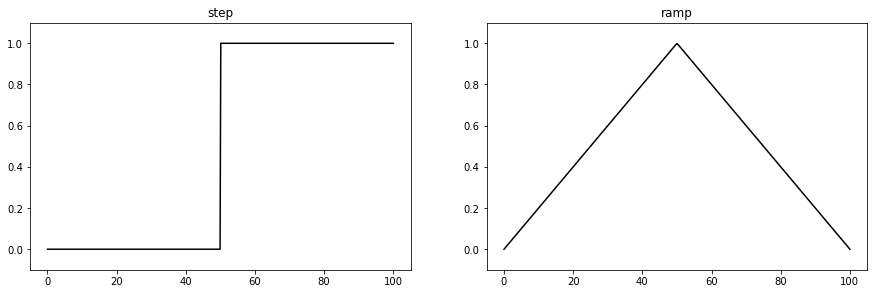

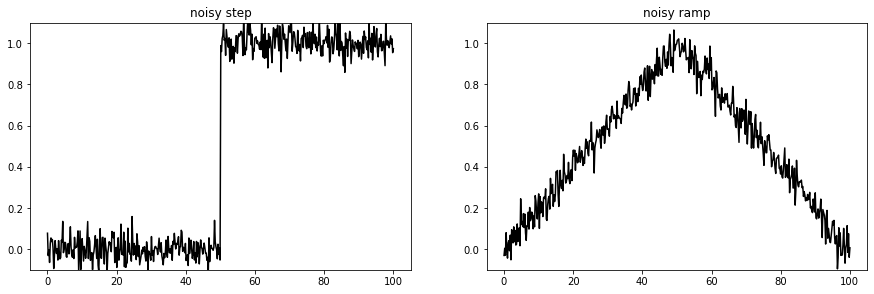

<Figure size 432x288 with 0 Axes>

In [2]:
run python/proto.py

Two basic operations we can perform are looking at the *local average* (e.g. mean) or *local difference* with a convolution operator.


For a local mean over extent 3, we would use

| _ | _ |_ |
| --- | --- | --- |
| 0.333 | 0.333 | 0.333 |

***What do the numbers add up to? why is that so***

***what would a filter of extent 7 look like?***

We would expect the local mean to provide some 'smoothing' of the function:


filter [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]


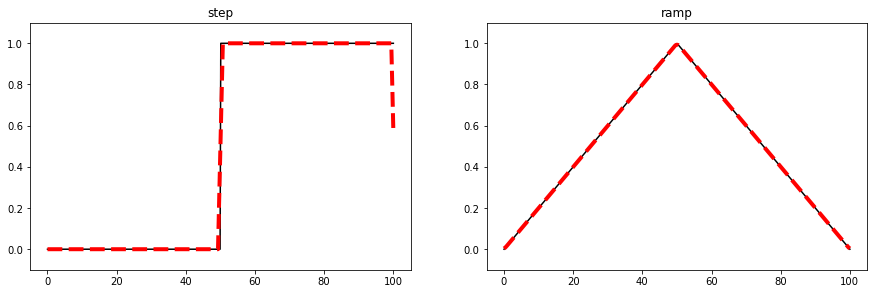

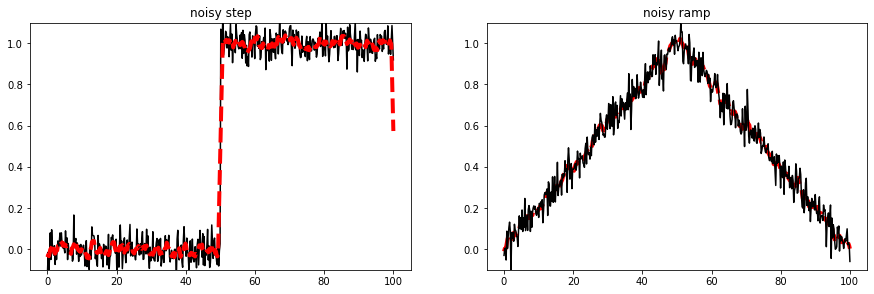

<Figure size 432x288 with 0 Axes>

In [3]:
run python/protoLow.py

We can see that this is the case in the illustration (filter width 7) the impact (of smoothing) on the 'clean' signals is mostly negligible (which is an effect we would want), and for the noisy datasets, the noise is reduced.

We can also note some 'edge effects' (e.g. the step at x = 100): 

**why do these occur?**

***does the extent of the edge effects depend on the extent of the filter? If so, why***

***what might be done to mitigate such effects?***


A local mean (low pass) filter then, such as that shown above reduces the high frequency components of the signal and retains the low frequency components (so we can 'get rid of' (reduce)) random noise in the signal.

A local mean is effectively a local *integration* of the signal.

The 'opposite' of this is differentiation, i.e. the difference between one pixel value and the next.

The simplest filter for this is:

| _ | _ |
| --- | --- | 
| 1 | -1 | 

which we can call a first order difference filter.

***what do the values in the filter add up to in this case?***

***why is this so?***

The impact of this is illustrated below.


filter [1.0, -1.0]


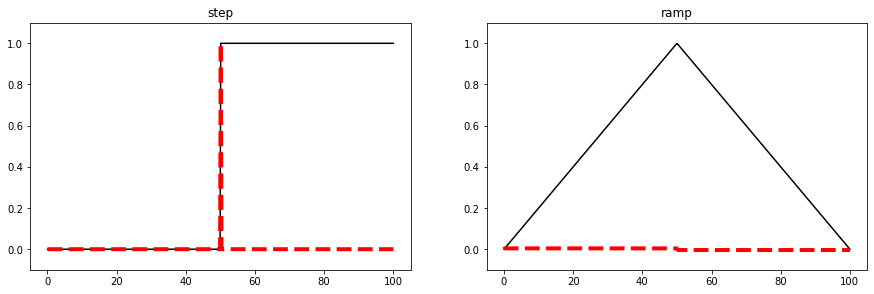

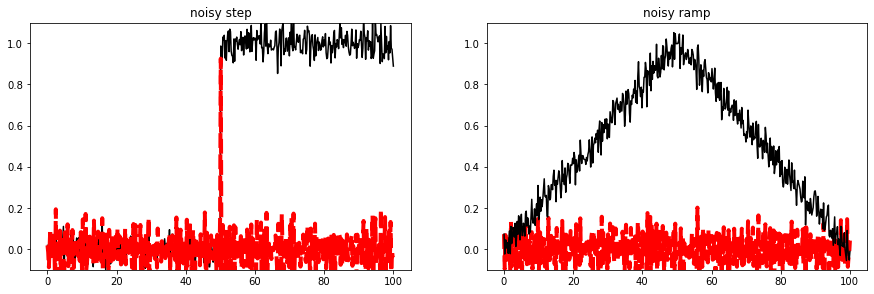

<Figure size 432x288 with 0 Axes>

In [4]:
run python/protoHi1.py

***Think through *why* it has the impact that we see.***

***Of what use might such a filter be?***

If we convolve the first order differential filter:

| _ | _ |
| --- | --- | 
| 1 | -1 | 

we get a *second order differential filter*

| _ | _ |_ |
| --- | --- | --- |
| 1 | -2 | 1|


Whereas the first filter represents the 'rate of change' (e.g. slope) of the signal, the second order filter gives the rate of change of the rate of change (rate of change of slope).

***what do the values in the filter add up to in this case?***

***why is this so?***


To illustrate this:

In [5]:
filt = [1.0,-1.0]
print (np.convolve(filt,filt))

[ 1. -2.  1.]


filter [1.0, -2.0, 1.0]


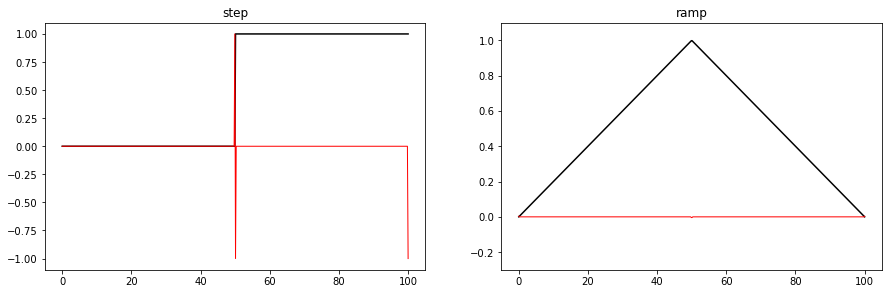

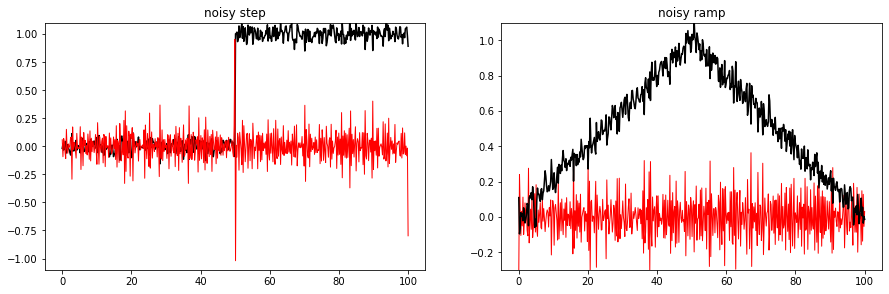

<Figure size 432x288 with 0 Axes>

In [6]:
run python/protoHi2.py

At first sight, this might look quite similar to the result of the first order differential.

However, if we look more closely:

filter [1.0, -2.0, 1.0]


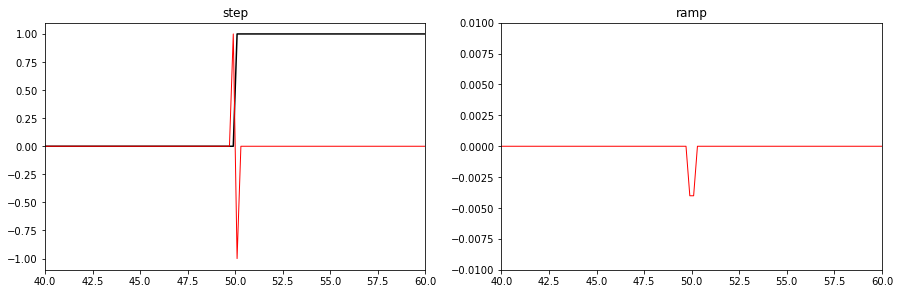

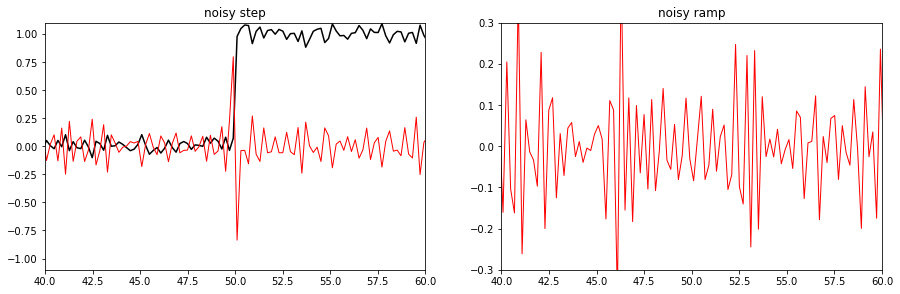

<Figure size 432x288 with 0 Axes>

In [7]:
run python/protoHi2zoom.py

we see e.g. that the 'edge' of the step edge is mapped to a 'zero crossing' in this case, rather than a local maximum as was the case for the first order filter.

The peak of the ramp shows a small negative value in the second order differential data: ***why is this so?***

***What would the result look like if we were to replace the step and ramp functions by one minus step and one minus ramp?*** 

As a final example, let us consider what happens if we *smooth* (low pass) and then *differentiate* (high pass):



In [8]:
# show the result of convolving one filter with another filter
filt1 = [1.0,-1.0]
w = 3
filt2 = [1./w]*w
print ('differential',str(['%4.2f'%i for i in filt1]).replace("'",''))
print ('smoother    ',str(['%4.2f'%i for i in filt2]).replace("'",''))
conv = np.convolve(filt1,filt2,'full')
print ('combined    ',str(['%4.2f'%i for i in conv]).replace("'",''))

differential [1.00, -1.00]
smoother     [0.33, 0.33, 0.33]
combined     [0.33, 0.00, 0.00, -0.33]


Applying two filters to an image/signal has the same effect as convolving the two filters together and then applying this.

We see that convolving a filter of extent 2 with one of extent 3 gives a new filter of extent 4. ***Why is this so?***

To demonstrate, in the plots below, we first convolve the step and ramp with `filter 1` (***what type of filter is this?***) (blue line), then convolve this with `filter 2` (***what type of filter is this?***) (green line). Applying the combined filter to the data, we get the dashed red line (which is the same as the green line).

filter 1:         [1.00, -2.00, 1.00]
filter 2:         [0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14]
combined filter:  [0.14, -0.14, 0.00, 0.00, 0.00, 0.00, 0.00, -0.14, 0.14]


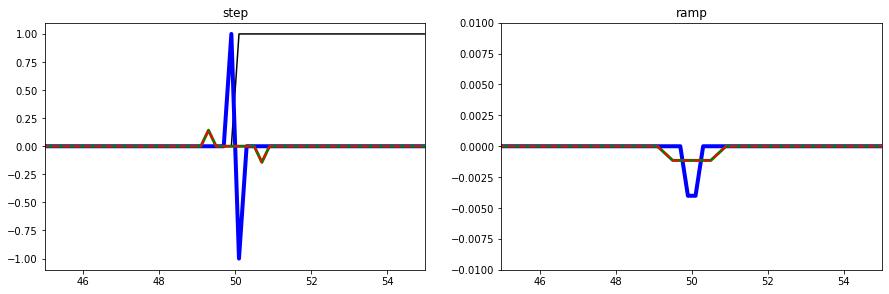

<Figure size 432x288 with 0 Axes>

In [9]:
run python/protoHiLow.py

Thinking through these graphs should re-inforrce what you have learned about spatial convolution in the lectures. You should be able to describe what the impact of different forms of filter on such prototype functions would be. You should then be able to translate this knowledge back to examining the image data.


***Go back to the `envi` session and examine the impact of first and second order differential and smoothing filters on the image data***

***Relate what you see (e.g. in looking in detail at transects) to the impacts on the prototype shapes***

***Of what use might all of this be?***


## 4. Extras (optional)

If you run these notes as an iPython notebook, then this shows an interactive tool to see the impact of filtering. **Additionally, if you open our pratical notebooks (you may have noticed the xxx.ipynb file extension) with Jupyter, it also allows you to make changes to the notes, and further down the line, to modify or even write your own code (e.g. for the coursework)!**

1) If you don't have [iPython Jupyter](https://ipython.org/) installed on your PC, please use the UCL Jupyter hub at https://jupyter.data-science.rc.ucl.ac.uk/ (UCL VPN required). 
![Jupyter@UCL-classic.png](images/Jupyter@UCL-classic.png)

2) Once you log onto the Hub, open a `New/Terminal`:
![Jupyter@UCL-classic-NewTerminal.jpeg](images/Jupyter@UCL-classic-NewTerminal.jpeg)

3) Copy & paste the following command line:
`wget https://github.com/qwu-570/GEOG0027/archive/notebooks.zip` and hit enter to execute it. This will download all the python notebooks and data needed for this module into your hub space. 
![wget.png](images/wget.png)

4) Once the zip file has been successfully downloaded, unzip it: `unzip notebooks.zip`.
![unzip.png](images/unzip.png)

5) Finally, browse into the `/GEOG0027-notebooks/docs` directory, and open the `SpatialFiltering.ipynb` file.
![open-notebook.png](images/open-notebook.png)

6) If needed, delete the zip file(s) to free up space.

From here, you can use the following interactive tool to explore the trade-offs you need to consider when filtering: e.g. a wider smoothing filter will suppress a higher level of noise (i.e. do more smoothing) than a narrow filter. However, with a wider filter, you are likely to suffer from greater 'edge effects'.

In [10]:
run python/interact.py

interactive(children=(Dropdown(description='Signal', options=('Step', 'Ramp', 'Flat', 'Pulse'), value='Step'),…

<Figure size 432x288 with 0 Axes>

##  Summary

The main aim of this practical is to reinforce your understanding of convolution operationsd using the image processing software tool `envi`.

In this practical, we have loaded Landsat images of London and and examined the application of high and low pass filters.
